# **Inteligencia Artificial**

## **Capítulo 9**

### **Deep Learning**

- **Unidad 1.** Red neuronal convolucional (CNN)
- **Unidad 2.** Red neuronal recurrente (RNN) para el modelado de datos secuenciales
- **Unidad 3.** Red Neural Adversarial Generativa para crear imágenes inexistentes

# **Quiz**

___

## ***Q 09-01***

### **1. El conjunto de datos MNIST consta de imágenes numéricas escritas en cursiva del 0 al 9. Si desea crear una red neuronal que clasifique los datos, ¿cuál es la función de activación de la última capa completamente conectada (=Densa)?**

### **Respuesta:**

La función de activación de la última capa completamente conectada (capa densa) de la red neuronal debe ser la función softmax.

**Razón:**

- La función softmax convierte las salidas de la red en probabilidades, asignando una probabilidad a cada una de las 10 clases (dígitos del 0 al 9).
  
- Esto asegura que la suma de las probabilidades sea 1, facilitando la interpretación del resultado como una distribución de probabilidad sobre las clases.
  
- La clase con la mayor probabilidad se toma como la predicción del modelo.

___

## ***Q 09-02***

### **La presión arterial, la altura y el peso forman los vectores de características. El conjunto de entrenamiento se proporciona de la siguiente manera.**
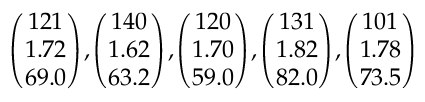

***1. Suponiendo que el vector de peso del perceptrón es $(-0.01,0.5,-0.23)^T$ y el sesgo es 0, explique el problema de escala con el conjunto de entrenamiento.***

El problema de escala ocurre cuando las características del conjunto de datos tienen diferentes rangos o unidades. En este caso, la presión arterial, la altura y el peso están en diferentes escalas:

- **Presión arterial:** ~100-140
- **Altura:** ~1.62-1.82
- **Peso:** ~59.0-82.0
  
Si estas características no se escalan adecuadamente, la red neuronal puede dar más importancia a las características con valores más grandes (por ejemplo, peso) y menos importancia a las características con valores más pequeños (por ejemplo, altura). Esto puede afectar negativamente el rendimiento del modelo y la eficiencia del entrenamiento.

***2. Escriba el conjunto de entrenamiento que resulta después de la aplicación de la siguiente fórmula de preprocesamiento.***

$$x_i^{new} = \frac{x_i^{old} -μ_i}{σ_i}  \text{   (5.9)}$$

In [3]:
# IMPORTAR LIBRERIAS 
import numpy as np
import pandas as pd
from IPython.display import display, HTML

# DATOS ORIGINALES
data = np.array([
    [121, 1.72, 69.0],
    [140, 1.62, 63.2],
    [129, 1.70, 59.0],
    [131, 1.82, 82.0],
    [101, 1.78, 73.5]
])

# CALCULAR LA MEDIA (μ) Y LA DESVIACIÓN ESTÁNDAR (σ) DE CADA CARACTERÍSTICA
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

# APLICAR LA FORMULA DE NORMALIZACION 
normalized_data = (data - means) / stds

# CONVERTIR A DATAFRAME
df = pd.DataFrame(normalized_data, columns=['Presion Arterial', 'Altura', 'Peso'])
 
# MOSTRAR LOS DATOS
display(HTML(df.to_html()))

,Presion Arterial,Altura,Peso
0,-0.258169,-0.116248,-0.042347
1,1.184541,-1.569343,-0.764742
2,0.349288,-0.406867,-1.287856
3,0.501152,1.336848,1.576814
4,-1.776811,0.755610,0.518132


***3. Explique su observación de si este preprocesamiento de datos alivia el problema de escala.***

El preprocesamiento de datos a través de la normalización, como se muestra en el código y en los resultados generados, tiene como objetivo aliviar el problema de escala que afecta a los algoritmos de aprendizaje automático, especialmente a los modelos de redes neuronales.

**Observaciones:**

- Al normalizar los datos, todas las características (presión arterial, altura y peso) se transforman a una escala común con media 0 y desviación estándar 1. Esto garantiza que ninguna característica domine a las otras debido a diferencias en la magnitud de sus valores originales.

- La normalización ayuda a que el algoritmo de aprendizaje converja más rápido y de manera más estable durante el entrenamiento. Los modelos como los perceptrones pueden asignar pesos de manera más equitativa a todas las características.

- En su estado original, características con valores mayores pueden tener un peso mayor en el modelo. Al normalizar los datos, se reduce este sesgo, permitiendo que todas las características contribuyan de manera equitativa al resultado final.

___

## ***Q 09-03***

### **Las redes neuronales y las capas convolucionales se repiten varias veces en el aprendizaje profundo y esto provoca que algunos nodos se omitan en gran medida. ¿Qué técnica puedes utilizar para prevenir este problema?**

### **Respuesta:**

***Una de las más efectivas es Dropout:***

Es una técnica de regularización que se utiliza para prevenir el sobreajuste en las redes neuronales profundas. Durante el entrenamiento, en cada iteración, se "apagan" aleatoriamente un porcentaje de neuronas en la capa, lo que fuerza a la red a aprender representaciones más robustas y distribuidas. Este apagado se realiza solo durante el entrenamiento; en la fase de inferencia (o test), todas las neuronas están activas, pero sus salidas se escalan para mantener el equilibrio en las magnitudes de las activaciones.

___

## ***Q 09-04***

### **La inicialización del peso debería generar números aleatorios en el rango [-r,r]. Proporcione el código Python que realiza esta función.**

In [5]:
# IMPORTAR LIBRERIA
import numpy as np

# DEFINIR FUNCION
def initialize_weights(shape, r):
    # GENERACION DE PESOS ALEATORIOS
    return np.random.uniform(-r, r, size=shape)

# DEFINIR PARAMETROS DE LA FUNCION 
shape = (3, 3)  
r = 0.1  

# LLAMAR A LA FUNCION 
weights = initialize_weights(shape, r)

# MOSTRAR RESPUESTA
print("Pesos inicializados:\n", weights)

Pesos inicializados:
 [[ 0.03160253  0.05145505 -0.06426744]
 [ 0.02504141  0.01579696 -0.06383197]
 [-0.02196705  0.0740961  -0.0025812 ]]


___

## ***Q 09-05***

### **Quiere entrenar un clasificador cuando tiene muchos datos de entrenamiento sin etiquetar pero solo unos pocos miles de datos etiquetados. Describe cómo el codificador automático puede ser útil y cómo funciona.**

### **Respuesta:**

#### **¿Cómo un codificador automático puede ser útil?**

- **Extracción de Características:** Los autoencoders pueden aprender a extraer características significativas de los datos sin necesidad de etiquetas. Estas características pueden luego ser utilizadas para entrenar un clasificador con los pocos datos etiquetados disponibles.
  
- ***Preentrenamiento No Supervisado:*** Se puede preentrenar el autoencoder utilizando los datos sin etiquetar. Posteriormente, la parte codificadora del autoencoder (encoder) se puede usar como una capa de características para un modelo supervisado.
  
- ***Reducción de Dimensionalidad:*** Los autoencoders pueden reducir la dimensionalidad de los datos, facilitando el entrenamiento de clasificadores en un espacio de características más pequeño y más manejable.

#### **¿Cómo funciona un codificador automático?**

*Un autoencoder consta de dos partes principales:*

- ***Encoder (Codificador):*** Transforma los datos de entrada a una representación de menor dimensión.
  
- ***Decoder (Decodificador):*** Reconstruye los datos originales a partir de la representación de menor dimensión.
  
El objetivo del autoencoder es minimizar la diferencia entre los datos de entrada y los datos reconstruidos. 

*Esto se logra a través de la siguiente arquitectura:*

$x -> Encoder -> z -> Decoder -> ^x$

**Donde:**

- $x$ es el dato de entrada.

- $z$ es la representación de menor dimensión (código).

- $^x$ es la reconstrucción del dato de entrada.

___

## ***Fin***